# 02456 Deep Learning - Acne Vulgaris vs Acne Rosacea


### Model: Retrain last layer of Inception V3

# This is the model with the highest test accuracy

#### Load the weights of the trained model, and evaluate some test images found using google image search (As provided training data is classified)

This notebook is used to show that the network works, by classifying an input image containing lesions of either Acne Vulgaris or Acne Rosacea. It is possible to use your own images by changing or adding images to one of the folders in the "test-images" folder. The class needs to follow the naming convention of the images already in the folders. for Rosacea images "rosacea_x.jpg" for vulgaris "vulgaris_x.jpg".

This model is trained using the Google implementation for retraining the Inception V3. The tutorial used is linked in the references below

Authors:
* s134859 Nicolai Mogensen
* s134569 Tobias Slot Jensen
* s144242 David Frich Hansen

References:

* The Google Transfer Learning implementation: https://www.tensorflow.org/tutorials/image_retraining


In [1]:
from label_image import *
import glob
import os
from pathlib import Path
import numpy as np
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

/opt/miniconda3/envs/jupyterhub/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
files = []
for file_path in glob.iglob('**/*.jpg', recursive=True):
    files.append(file_path)
    
X = []
y = []
for file in files:
    patient_type = str(file).split("/")[1]
    X.append(str(file))
    if(patient_type == "vulgaris"):
        y.append(0)
    else:
        y.append(1)

X = np.asarray(X)
y = np.asarray(y)

In [3]:
# The labels and graph objects as outputted by the retrain.py script
labels = "output_labels.txt"
graph = "output_graph.pb"
output_layer = "final_result:0"
input_layer = 'DecodeJpeg/contents:0'


# load labels
labels = load_labels(labels)
# load graph, which is stored in the default session
load_graph(graph)

y_prob = []
y_pred = []
for im in X:
    image_data = load_image(im)
    
    preds = run_graph(image_data, labels, input_layer, output_layer,5)
    y_prob.append(preds)
    y_pred.append(np.argmax(preds))
    

Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)
Tensor("final_result:0", shape=(?, 2), dtype=float32)


# Evaluation

##### Predictions on the test-images sourced using Google Image search.

In [4]:
X = []
y = []
for file in files:
    patient = str(file).split("/")[-1]
    patient_type = str(file).split("/")[1]
    img = resize(imread(file),(299,299,3),mode="constant")
    #print(img.shape)
    X.append(img)
    if(patient_type == "vulgaris"):
        y.append(0)
    else:
        y.append(1)

X = np.asarray(X)
y = np.asarray(y)


Prediction: 0 Vulgaris [ 0.84799933  0.15200067]
True: 0 Vulgaris


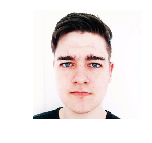


Prediction: 0 Vulgaris [ 0.84635812  0.15364188]
True: 0 Vulgaris


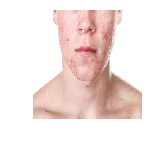


Prediction: 0 Vulgaris [ 0.63109237  0.36890763]
True: 0 Vulgaris


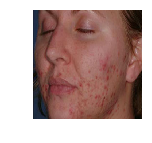


Prediction: 0 Vulgaris [  9.99697566e-01   3.02496308e-04]
True: 0 Vulgaris


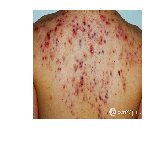


Prediction: 0 Vulgaris [ 0.63312382  0.36687616]
True: 1 Rosacea


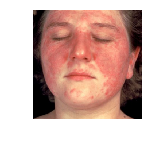


Prediction: 0 Vulgaris [ 0.96892279  0.03107721]
True: 1 Rosacea


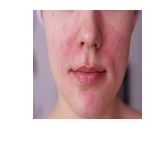


Prediction: 1 Rosacea [ 0.45911449  0.54088551]
True: 1 Rosacea


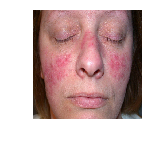


Prediction: 1 Rosacea [ 0.21886823  0.78113174]
True: 1 Rosacea


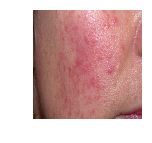


Prediction: 1 Rosacea [ 0.30358958  0.69641042]
True: 1 Rosacea


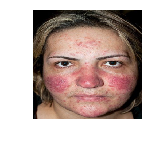

In [5]:
import matplotlib.pyplot as plt
for i in range(len(X)):
    plt.figure(figsize = (2,2))
    plt.imshow(X[i])
    plt.axis('off')

    acne_pred = "Vulgaris"
    acne_true = "Vulgaris"
    if(y_pred[i] == 1):
        acne_pred = "Rosacea"
    if(y[i] == 1):
        acne_true = "Rosacea"

    print("\nPrediction: " + str(y_pred[i]) + " " + acne_pred + " " + str(y_prob[i]))
    print("True: " + str(y[i]) + " " + acne_true)
    plt.show()